<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [9]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

In [11]:
shd = pd.read_csv(sac_csv)

shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [17]:
shd.shape

(985, 12)

In [12]:
# A:
shd.dtypes


street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [13]:
shd['zip'] = shd['zip'].astype(str)

In [14]:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [ ]:
#negative price
#some data is weird

In [15]:
shd.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
POLLOCK PINES        3
GRANITE BAY          3
WEST SACRAMENTO      3
RANCHO MURIETA       3
LOOMIS               2
EL DORADO            2
GARDEN VALLEY        1
PENRYN               1
WALNUT GROVE         1
GREENWOOD            1
COOL                 1
FORESTHILL           1
MATHER               1
SLOUGHHOUSE          1
MEADOW VISTA         1
SHINGLE SPRINGS      1
DIAMOND SPRINGS      1
Name: city, dtype: int64

In [16]:
shd[shd['beds'] == 0]

#there are 108 rows of data with 0 beds

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


In [18]:
#check those with negative price

shd[shd['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [21]:
shd[shd['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [22]:
shd.drop(703, inplace = True) #this uses the index to drop the value

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

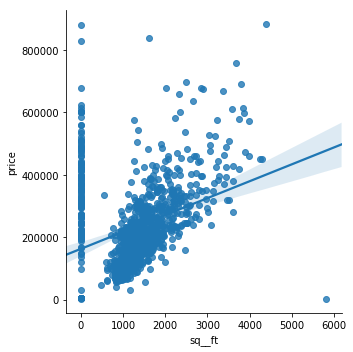

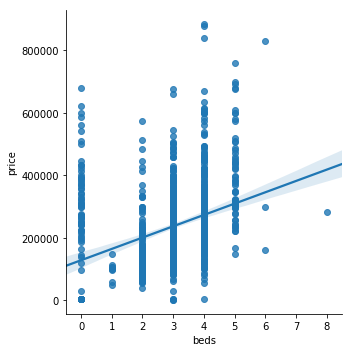

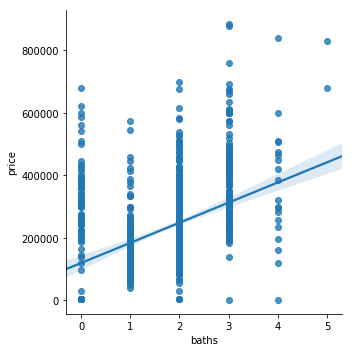

In [24]:
# A


sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

In [27]:
shd.to_csv('./sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: